# 1. Preparation: import libraries and load data

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from bayes_opt import BayesianOptimization


In [2]:
train = pd.read_csv(filepath_or_buffer="train.csv")
test = pd.read_csv(filepath_or_buffer="test.csv")

# 2. EDA

**Dimensions and summary**<br>
**Missingness**<br>
**Distribution of variables**<br>
**correlations**<br>

In [3]:
print("Train dataset has {} rows and {} columns.".format(train.shape[0], train.shape[1]))
print("Test dataset has {} rows, and {} columns.".format(test.shape[0], test.shape[1]))

Train dataset has 595212 rows and 59 columns.
Test dataset has 892816 rows, and 58 columns.


In [4]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

In [5]:
train.head(20)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,1.8,2.332649,10,0,-1,0,0,14,1,1,0,1,104,2,0.445982,0.879049,0.406202,3.000000,0.7,0.8,0.4,3,1,8,2,11,3,8,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.6,0.1,0.617454,6,1,-1,0,1,11,1,1,0,1,99,2,0.316228,0.639683,0.368782,3.162278,0.2,0.6,0.5,2,2,8,1,8,3,10,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,0,0,0,0,0,0,13,1,0,0,0.7,0.4,0.607248,11,1,0,0,0,11,1,1,2,1,30,3,0.446990,0.900574,0.374833,3.316625,0.1,0.5,0.1,1,2,7,1,6,1,13,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,0,0,0,0,0,0,6,1,0,0,0.9,0.7,0.901388,10,1,-1,0,1,14,1,1,0,1,68,3,0.400000,0.780641,0.407431,2.828427,0.9,0.8,0.6,3,1,7,3,9,4,11,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,0,0,0,0,0,0,4,0,0,1,0.9,1.4,2.316652,11,0,0,1,0,14,1,1,2,1,104,2,0.447214,1.458184,0.390256,3.605551,0.7,0.8,0.8,2,2,8,2,9,1,11,3,5,0,6,0,1,0,0,1,0


In [6]:
train.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

### Note: classes are imbalanced

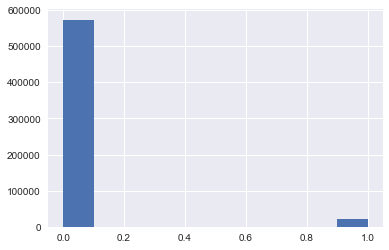

In [7]:
plt.hist(train.target)
plt.show()

In [8]:
print("{} rows who didn't filed claim".format(sum(train.target==0)))
print("{} rows who filed claim".format(sum(train.target==1)))

573518 rows who didn't filed claim
21694 rows who filed claim


### No missingness (missing values are filled with -1)

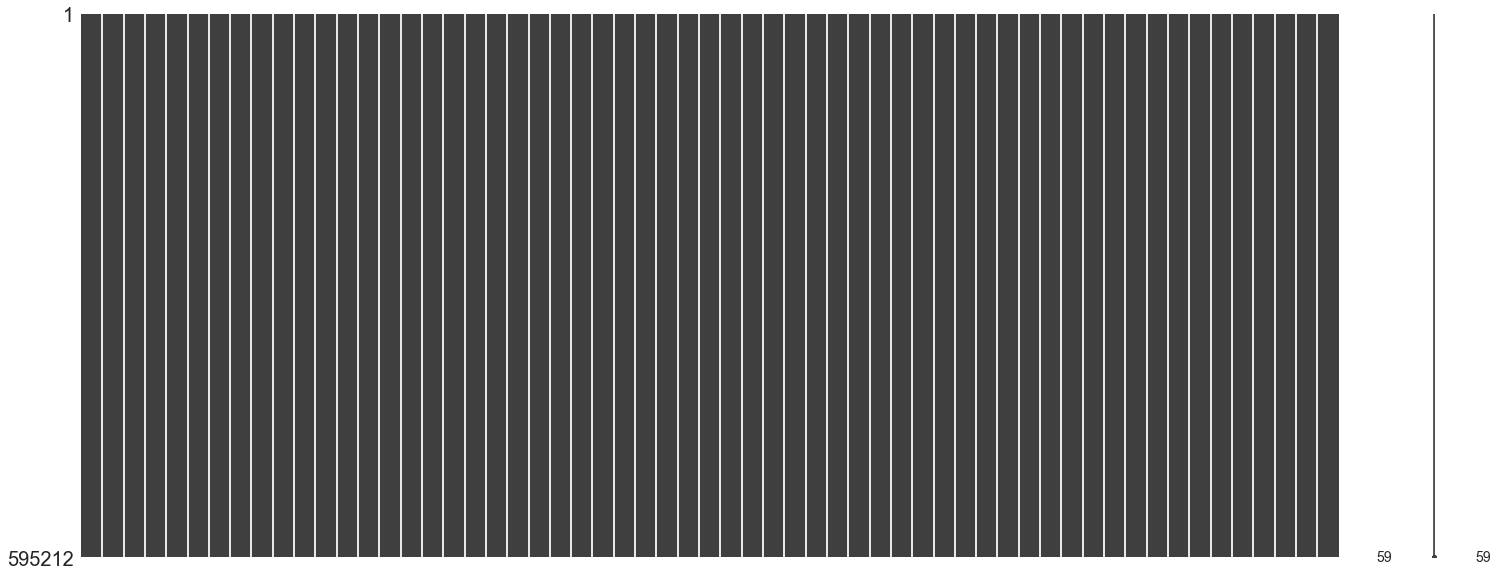

In [9]:
msno.matrix(train)
# msno.heatmap(train)

### Histogram of variables

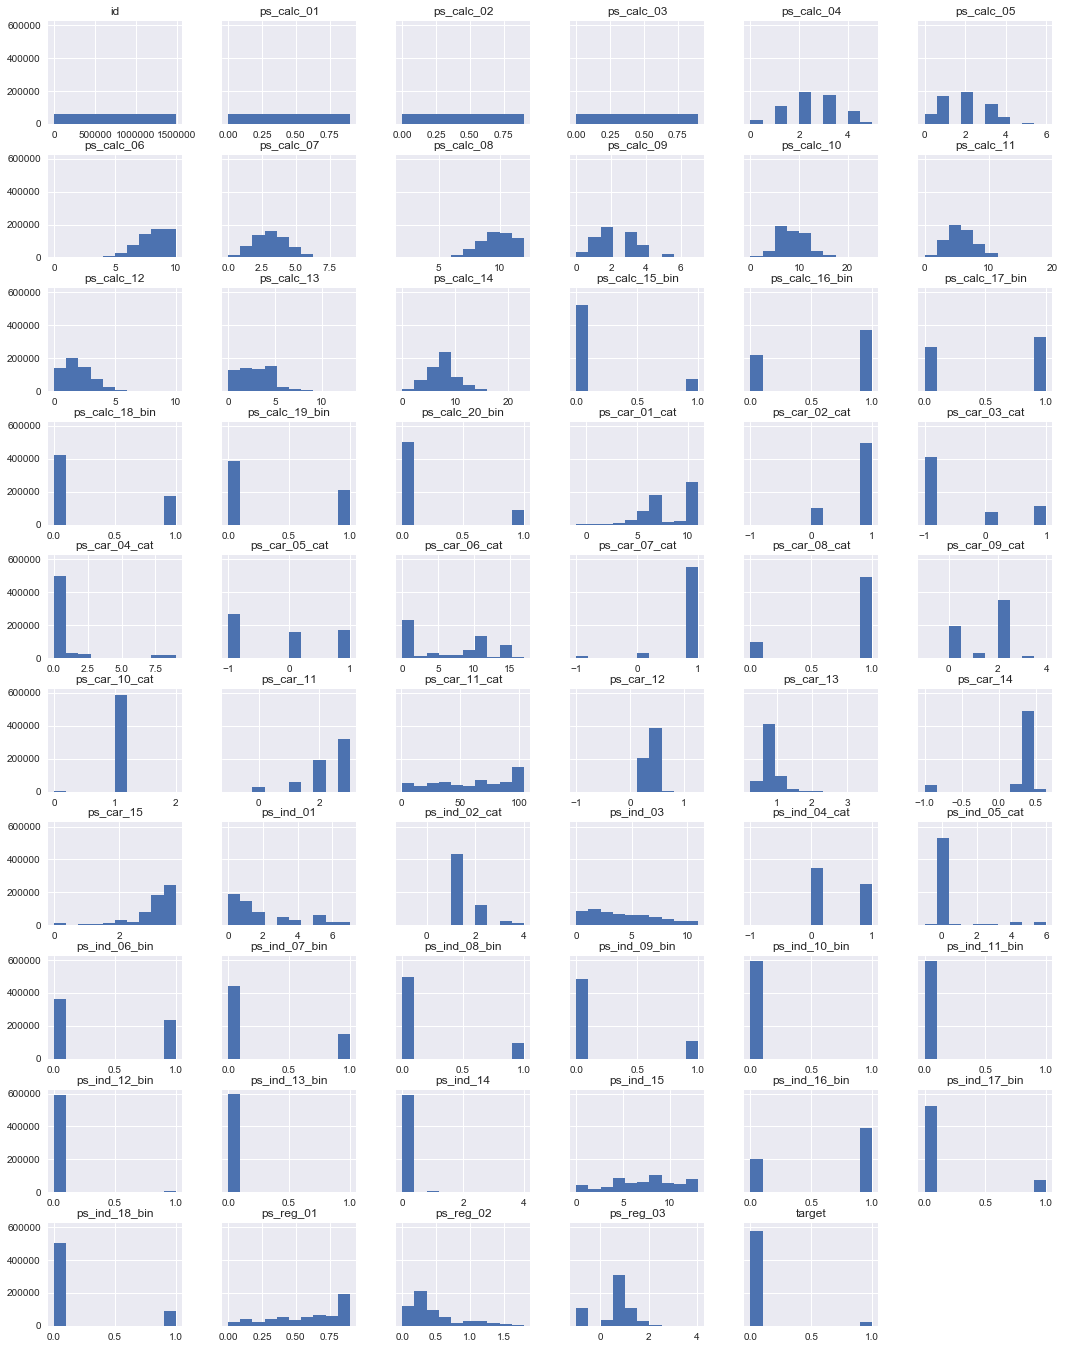

In [10]:
train.hist(figsize=(18,24),sharey=True, layout=(-1,6))
plt.show()

### Check correlations between features

In [ ]:
# Don't work, computer stucks running these:
# sns.pairplot(train.iloc[:,1:])
# sns.heatmap(train)

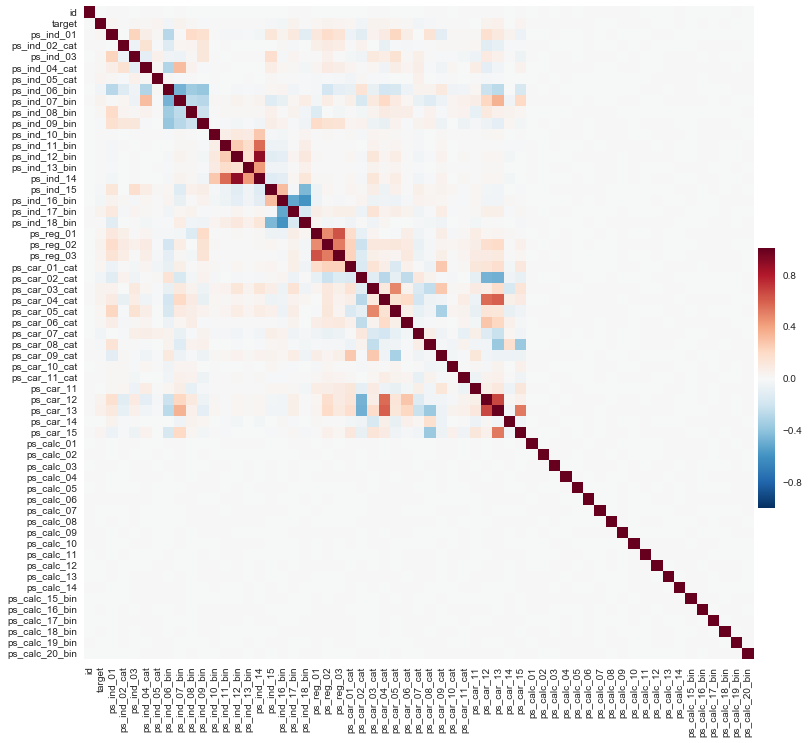

In [11]:
corr = train.corr()
fig, ax = plt.subplots(1, 1, figsize = (12,12))
cbar_ax = fig.add_axes([.905, .3, .02, .3])
sns.heatmap(corr, ax=ax, cbar_ax = cbar_ax, cbar=True)
plt.show()

# 3. Data preparation: preprocessing, feature engineering

**One hot encoding for cat features**<br>
**train test split**<br>
**no feature engineering for now**


### train test split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(train.iloc[:,2:], train.iloc[:,1],
                                                    test_size = 0.3, random_state=88, stratify=train.iloc[:,1])

In [13]:
print(sum(y_train==0))
print(sum(y_train==1))

401462
15186


# 4. Machine learning models

**logistic regression**<br>
**random forest**<br>
**GBM**<br>
**SVM**<br>
**XGBoost**<br>
**Neural Network**<br>

### define evaluation metric

In [20]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert(len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:,2], -1*all[:,1]))]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
 
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def test_gini():
    def fequ(a,b):
        return abs(a-b) < 1e-6
    def T(a, p, g, n):
        assert( fequ(gini(a,p), g) )
        assert( fequ(gini_normalized(a,p), n) )
    T([1, 2, 3], [10, 20, 30], 0.111111, 1)
    T([1, 2, 3], [30, 20, 10], -0.111111, -1)
    T([1, 2, 3], [0, 0, 0], -0.111111, -1)
    T([3, 2, 1], [0, 0, 0], 0.111111, 1)
    T([1, 2, 4, 3], [0, 0, 0, 0], -0.1, -0.8)
    T([2, 1, 4, 3], [0, 0, 2, 1], 0.125, 1)
    T([0, 20, 40, 0, 10], [40, 40, 10, 5, 5], 0, 0)
    T([40, 0, 20, 0, 10], [1000000, 40, 40, 5, 5], 0.171428, 0.6)
    T([40, 20, 10, 0, 0], [40, 20, 10, 0, 0], 0.285714, 1)
    T([1, 1, 0, 1], [0.86, 0.26, 0.52, 0.32], -0.041666, -0.333333)

### 4.5 XGBoost

**define metric for xgb**

In [14]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return 'gini', gini_score

**prepare data**

In [15]:
train_df = xgb.DMatrix(x_train, label = y_train)

**setting parameters for tuning**

In [124]:
param = {'eta':0.025,  # learning_rate
         'silent':0,  # printing running messages
         'objective':'binary:logistic', # logistic regression for binary classification, output probability
         'subsample': 0.8,  # subsample rows
         'colsample_bytree': 0.4,  # subsample columns
         'gamma': 0.65, # minimum loss reduction required to make a further partition on a leaf node of the tree
         'max_depth':7,  # maximum depth of a tree, 4-10
         'min_child_weight':10,  # minimum sum of instance weight (hessian) needed in a child
         'colsample_bylevel': 0.7, # subsample ratio of columns for each split, in each level
         'scale_pos_weight': 26.44, # 401462/15186 for balancing the classes
         'max_delta_step': 1.8 # help in logistic regression when class is extremely imbalanced, 1-10
         }

**manually cv**

In [125]:
cv_result = xgb.cv(params=param, dtrain=train_df, num_boost_round=700, nfold=5, feval=gini_xgb,\
                   stratified=True, early_stopping_rounds=50, maximize=True,\
                   verbose_eval=True, seed=88)

[0]	train-error:0.435693+0.130272	train-gini:0.0847912+0.0220748	test-error:0.435367+0.129913	test-gini:0.0854952+0.0195912
[1]	train-error:0.4163+0.112664	train-gini:0.117035+0.0452871	test-error:0.416695+0.112712	test-gini:0.113385+0.0388531
[2]	train-error:0.461488+0.0263603	train-gini:0.14172+0.0381092	test-error:0.462851+0.0271332	test-gini:0.13549+0.0321642
[3]	train-error:0.420783+0.0217164	train-gini:0.168542+0.0406273	test-error:0.422112+0.0232517	test-gini:0.159079+0.0389611
[4]	train-error:0.422494+0.0226138	train-gini:0.176985+0.0437876	test-error:0.423595+0.0230145	test-gini:0.165338+0.0406505
[5]	train-error:0.421154+0.0221581	train-gini:0.184479+0.0378889	test-error:0.422224+0.0231896	test-gini:0.173199+0.0348476
[6]	train-error:0.411859+0.00496881	train-gini:0.190938+0.0380422	test-error:0.412962+0.00524421	test-gini:0.177889+0.0378377
[7]	train-error:0.41563+0.0179819	train-gini:0.200764+0.0292564	test-error:0.41693+0.0173201	test-gini:0.184222+0.0287458
[8]	train-erro

[65]	train-error:0.368971+0.00776251	train-gini:0.25085+0.00255864	test-error:0.369648+0.00789085	test-gini:0.233807+0.0158843
[66]	train-error:0.36755+0.00732115	train-gini:0.251936+0.00298344	test-error:0.368323+0.00715993	test-gini:0.234661+0.0159552
[67]	train-error:0.368025+0.00725035	train-gini:0.252243+0.00269412	test-error:0.368673+0.00718487	test-gini:0.234901+0.0159822
[68]	train-error:0.368417+0.00619939	train-gini:0.252541+0.00267192	test-error:0.368885+0.00633991	test-gini:0.235457+0.0155759
[69]	train-error:0.368984+0.00719644	train-gini:0.252823+0.0030386	test-error:0.369482+0.00690889	test-gini:0.235844+0.0158901
[70]	train-error:0.368321+0.00771069	train-gini:0.253164+0.00265639	test-error:0.36894+0.00734443	test-gini:0.235876+0.016031
[71]	train-error:0.368905+0.00820052	train-gini:0.253889+0.00235069	test-error:0.369523+0.00754413	test-gini:0.236347+0.0164338
[72]	train-error:0.36938+0.00742864	train-gini:0.253585+0.00214899	test-error:0.370284+0.00668182	test-gini:0

In [129]:
cv_result['test-gini-mean'].values[-1]

0.23996699999999999

**Using Bayesian Optimization**

In [32]:
def xgb_evaluate(
                 colsample_bytree,
                 colsample_bylevel,
                 max_depth,
                 subsample,
                 gamma,
                 max_delta_step
                 # min_child_weight,
                 # eta
                ):
    params = {
        'objective':'binary:logistic',
        'scale_pos_weight': 26.44,
        'min_child_weight': 80,
        'eta': 0.04,
        'silent': 0,
        #'eval_metric': 'auc'
    
        'cosample_bytree': max(min(colsample_bytree, 1), 0),
        'colsample_bylevel': max(min(colsample_bylevel, 1), 0),
        'max_depth': int(max_depth),
        'subsample': max(min(subsample, 1), 0),
        'gamma': max(gamma, 0),
        'max_delta_step': max(max_delta_step, 0)
             }

    cv_result = xgb.cv(params, 
                       train_df, 
                       num_boost_round=num_rounds, 
                       nfold=5,
                       seed=random_state, 
                       stratified=True, 
                       maximize=True, 
                       feval=gini_xgb, 
                       callbacks=[xgb.callback.early_stop(50, maximize=True)])

    return cv_result['test-gini-mean'].values[-1]

In [ ]:
if __name__ == '__main__':

    num_rounds = 400
    random_state = 2017
    num_iter = 10
    init_points = 3

    xgbBO = BayesianOptimization(xgb_evaluate, {
                                                'colsample_bytree': (0.1, 1),
                                                'colsample_bylevel': (0.1, 1),
                                                'max_depth': (4, 10),
                                                'subsample': (0.1, 1),
                                                'gamma': (0, 10),
                                                'max_delta_step': (1, 10)
                                                # 'min_child_weight': (0, 400),
                                                # 'eta': (0.0001, 0.01),
                                                })

    xgbBO.maximize(init_points=init_points, n_iter=num_iter)

Initialization
-----------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bylevel |   colsample_bytree |     gamma |   max_delta_step |   max_depth |   subsample | 
Multiple eval metrics have been passed: 'test-gini' will be used for early stopping.

Will train until test-gini hasn't improved in 50 rounds.
Stopping. Best iteration:
[315]	train-error:0.360316+0.00308119	train-gini:0.342294+0.00188844	test-error:0.364228+0.00372978	test-gini:0.270263+0.00634567

    1 | 09m00s |    0.27026 |              0.2085 |             0.1189 |    3.8731 |           3.6519 |      4.8440 |      0.3340 | 
Multiple eval metrics have been passed: 'test-gini' will be used for early stopping.

Will train until test-gini hasn't improved in 50 rounds.
Stopping. Best iteration:
[135]	train-error:0.34642+0.00362705	train-gini:0.346459+0.00204008	test-error:0.350488+0.00430601	test-gini:0.264871+

In [ ]:
xgbBO.maximize(init_points=0, n_iter=5)

# 5. Output predictions